In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10

In [ ]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
y_train.shape

170508288/170498071 [==============================] - 3s 0us/step


(50000, 1)

In [ ]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],3)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],3)

print(x_train.shape, x_test.shape)


(50000, 32, 32, 3) (10000, 32, 32, 3)


In [ ]:
#y라벨 one hot encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_test_s = tf.keras.utils.to_categorical(y_test)

print(y_train.shape, y_test_s.shape)

(50000, 10) (10000, 10)


In [ ]:
# normalizaiton
print(x_train.max(), x_test.max())
x_train = x_train/ x_train.max()
x_test = x_test/ x_test.max()
print(x_train.max(), x_test.max())

255 255
1.0 1.0


In [ ]:
augment = keras.Sequential(
    [
     keras.layers.experimental.preprocessing.RandomFlip('horizontal',input_shape = (32,32,3)),
     keras.layers.experimental.preprocessing.RandomRotation(0.2),
     keras.layers.experimental.preprocessing.RandomZoom(0.1)
    ])

In [ ]:
model = keras.Sequential([
    augment,
    keras.layers.Conv2D(32,3,kernel_initializer= 'he_normal',activation='relu',padding = 'same'),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(32,3,kernel_initializer= 'he_normal',activation='relu',padding = 'same'),
    keras.layers.MaxPooling2D(),

    keras.layers.Conv2D(64,3,kernel_initializer= 'he_normal',activation='relu',padding = 'same'),
    keras.layers.Dropout(0.3),
    keras.layers.Conv2D(64,3,kernel_initializer= 'he_normal',activation='relu',padding = 'same'),
    keras.layers.MaxPooling2D(),

    keras.layers.Conv2D(128,3,kernel_initializer= 'he_normal',activation='relu',padding = 'same'),
    keras.layers.Dropout(0.4),
    keras.layers.Conv2D(128,3,kernel_initializer= 'he_normal',activation='relu',padding = 'same'),
    keras.layers.MaxPooling2D(),

    keras.layers.Flatten(),
    keras.layers.Dense(512,kernel_initializer = 'he_normal',activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10,activation = 'softmax')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_48 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_49 (Dropout)         (None, 16, 16, 64)       

In [ ]:
# mdoel compile

loss = tf.keras.losses.categorical_crossentropy
optimizer = tf.keras.optimizers.Adam()
metric = tf.keras.metrics.categorical_accuracy

model.compile(loss = loss,
              optimizer = optimizer,
              metrics = [metric])



In [ ]:
# 모델 최적화 설정
import os
MODEL_DIR = '/content/model_data'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath= MODEL_DIR + '/{epoch:02d}-{val_loss:.4f}.hdf5'
callback_list=[tf.keras.callbacks.ModelCheckpoint(filepath = modelpath, monitor = 'val_loss',verbose = 1,save_best_only= True),
               tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience = 15)]

In [ ]:
history = model.fit(x_train,y_train,validation_split = 0.1, shuffle = True, epochs = 100,batch_size = 400,callbacks = callback_list)

Epoch 1/100
113/113 [==============================] - 10s 88ms/step - loss: 0.6773 - categorical_accuracy: 0.7650 - val_loss: 0.6879 - val_categorical_accuracy: 0.7774

Epoch 00001: val_loss improved from inf to 0.68792, saving model to /content/model_data/01-0.6879.hdf5
Epoch 2/100
113/113 [==============================] - 10s 87ms/step - loss: 0.6661 - categorical_accuracy: 0.7674 - val_loss: 0.6487 - val_categorical_accuracy: 0.7848

Epoch 00002: val_loss improved from 0.68792 to 0.64872, saving model to /content/model_data/02-0.6487.hdf5
Epoch 3/100
113/113 [==============================] - 10s 87ms/step - loss: 0.6593 - categorical_accuracy: 0.7690 - val_loss: 0.6321 - val_categorical_accuracy: 0.7834

Epoch 00003: val_loss improved from 0.64872 to 0.63209, saving model to /content/model_data/03-0.6321.hdf5
Epoch 4/100
113/113 [==============================] - 10s 87ms/step - loss: 0.6684 - categorical_accuracy: 0.7681 - val_loss: 0.6478 - val_categorical_accuracy: 0.7848

Epo

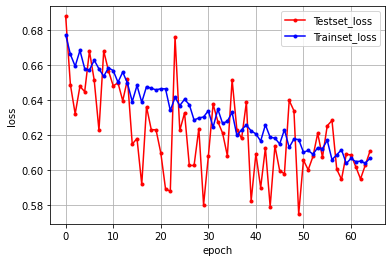

In [ ]:
# 테스트 셋의 오차
import numpy as np
import matplotlib.pyplot as plt
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


In [ ]:
model2 = keras.models.load_model('/content/model_data/50-0.5749.hdf5')
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_48 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_49 (Dropout)         (None, 16, 16, 64)       

In [ ]:
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test_s)[1]))

313/313 [==============================] - 2s 7ms/step - loss: 0.6420 - categorical_accuracy: 0.7924

 Test Accuracy: 0.7924


In [ ]:
class_names= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i][0], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                )

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i][0]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

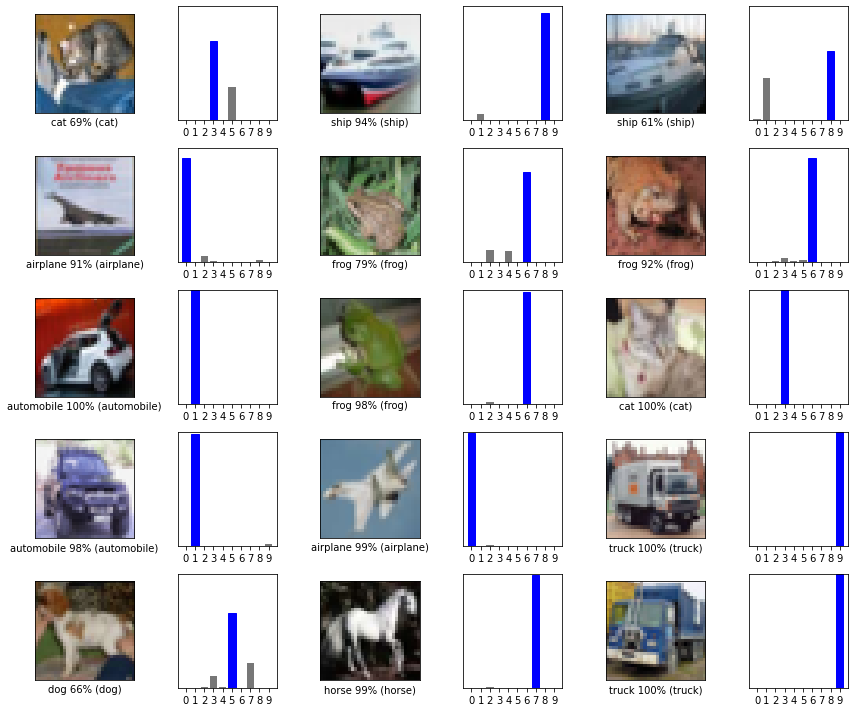

In [ ]:
predictions  = model.predict(x_test)

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()